In [1]:
import qiskit.quantum_info as qi, numpy as np, matplotlib.pyplot as plt
from qiskit import *
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_distribution

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Grover's Algorithm: 

A *Quantum Algorithm* is a set of interactions that can be performed on a quantum computer to solve a problem, using the Principles of Quantum Mechanics, like
1. Superposition,
2. Entanglement, and
3. Interference.

Here we consider the *Grover Algorithm*, which is a *Quantum Search Algorithm* that can be used to find a specific element in an unsorted database/dataset.

Take for example a list of elements of your choice:

In [2]:
my_list = np.random.randint(0, 10, 10) # Change this as you please
my_list

array([0, 5, 3, 7, 7, 2, 3, 4, 8, 0])

We define an ``oracle`` function that returns ``True`` if the element is in the list, and ``False`` otherwise:

In [3]:
def oracle(my_input):
    winner = 0
    if my_input == winner:
        return True
    else:
        return False
    
for index, trial_number in enumerate(my_list):
    if oracle(trial_number):
        print(f"Trial number at index {index} is the winner!")
        print(f"{index + 1} calls to the Oracle used")
        break

Trial number at index 0 is the winner!
1 calls to the Oracle used


On average, the Oracle takes $O(N)$ time to find the element in the list, or $N/2$ tries, where $N$ is the number of elements in the list.

What's really impressive (but not surprising), the quantum computer does this in $O(\sqrt N)$ time, or in $\sqrt N/2$ tries, using Grover's Algorithm. We can introduce the list elements as encoded **basis states,** and the ``oracle`` as a **unitary operator,** (or a $\mathrm{CZ}$ Gate) and the algorithm will find the element in the list in $O(\sqrt N)$ time.
For example, if the state $\ket{11}$ is the winner, then the oracle spits out $-\ket{11}$. Hence the oracle would comprise a $\mathrm{CZ}$ Gate alongside a **reflection operation,** performed by an $X$-Gate. The combination of these two is called the *Grover Iterant.*

*.

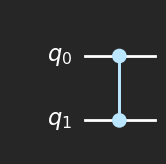

In [4]:
oracle = QuantumCircuit(2, name = 'oracle')
oracle.cz(0, 1) # CZ Gate on qubits 0 and 1
oracle.to_gate()

oracle.draw('mpl', style = 'iqx-dark')

Here we made the Oracle a gate in of itself. Let's get to the actual Grover Circuit itself:

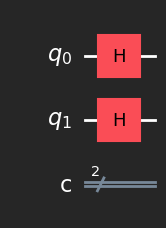

In [5]:
backed_oracle = Aer.get_backend('statevector_simulator')
grover = QuantumCircuit(2, 2)
grover.h([0, 1]) # Hadamard Gates on qubits 0 and 1

grover.draw('mpl', style = 'iqx-dark')

In [6]:
job = execute(grover, backend = backed_oracle)
statevector = job.result().get_statevector()
np.around(statevector, 3)

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

And now the reflection operation:

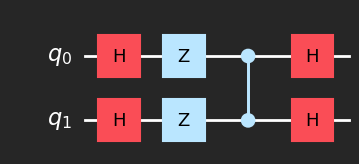

In [7]:
reflection = QuantumCircuit(2, name = 'reflection')
reflection.h([0, 1]) # Hadamard Gates on qubits 0 and 1
reflection.z([0, 1]) # Z Gates on qubits 0 and 1
reflection.cz(0, 1) # CZ Gate on qubits 0 and 1
reflection.h([0, 1]) # Hadamard Gates on qubits 0 and 1
reflection.to_gate()


reflection.draw('mpl', style = 'iqx-dark')

Now we add the oracle and reflection gates to out Grover circuit and measure the results:

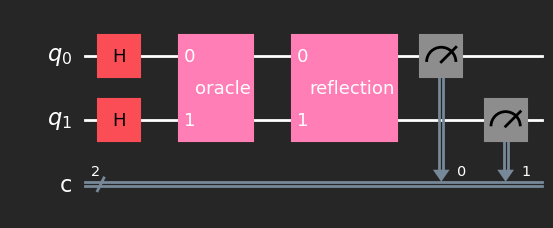

In [8]:
backend = Aer.get_backend('qasm_simulator')
grover.append(oracle, [0, 1])
grover.append(reflection, [0, 1])
grover.measure([0, 1], [0, 1])

grover.draw('mpl', style = 'iqx-dark')

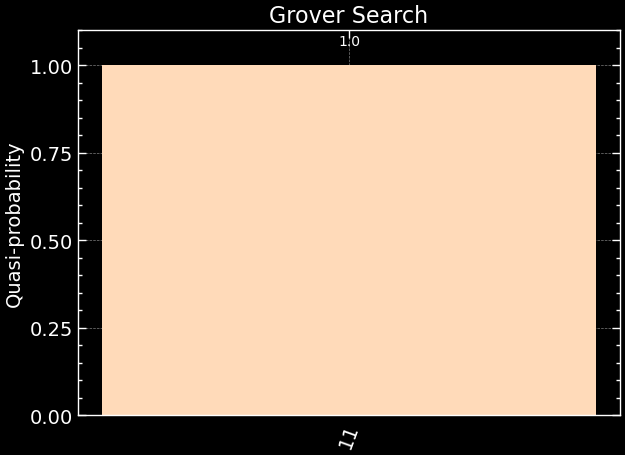

In [9]:
job = execute(grover, backend = backed_oracle, shots = 1)
counts = job.result().get_counts()

plot_distribution(counts, color = 'peachpuff', title = 'Grover Search')

# Additional Topics: The Fourier Checking Circuit

The *Fourier Checking Circuit* is an important tool used in signal processing and applied in various Quantum Algorithms, like *Shor's Algorithm* and *Quantum Phase Estimation*. It is used to check whether a given function is periodic or not. The circuit is based on the *Quantum Fourier Transform* and the *Quantum Phase Estimation* algorithm.

Feel free to introduce two functions $f$ and $g$. This algorithm correlates the Fourier Transform of $g$ to $f$. The circuit will output a probability for the $\ket{00}$ state, and if $P(f,g)\geq 0.05$ then the functions are correlated, otherwise they are not.

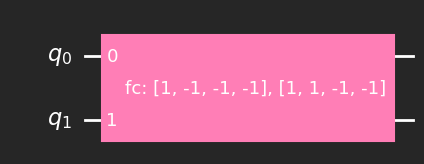

In [10]:
f = [1, -1, -1, -1]
g = [1, 1, -1, -1] # Feel free to change these as you please

circ = FourierChecking(f = f, g = g)
circ.draw('mpl', style = 'iqx-dark')

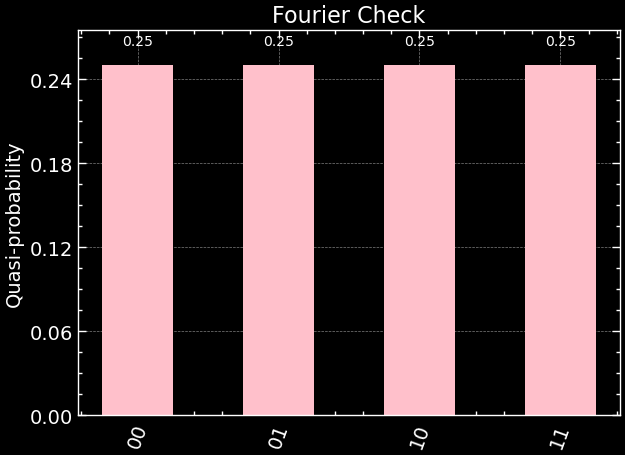

In [11]:
zero = qi.Statevector.from_label('00')
statevector = zero.evolve(circ)  
probs = statevector.probabilities_dict()

plot_distribution(probs, color = 'pink', title = 'Fourier Check')

# Draw Your Own Conclusions:

Again note that we're interested only in the $\ket{00}$ probability, which is...
and hence the functions you've chosen are...